In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn import preprocessing


In [2]:
titanic=pd.read_csv(r"D:\DSA - ICT\Week 9\Case study\titanic_dataset.csv")

In [3]:
#Question 1 - Load the dataset into python environment

In [4]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#Question 2 - Make ‘PassengerId’ as the index column

In [6]:
titanic=titanic.set_index("PassengerId")
titanic

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [7]:
#Question 3 - Check the basic details of the dataset

In [8]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [9]:
titanic.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
titanic.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [11]:
#visualizing missing values 

<AxesSubplot:ylabel='PassengerId'>

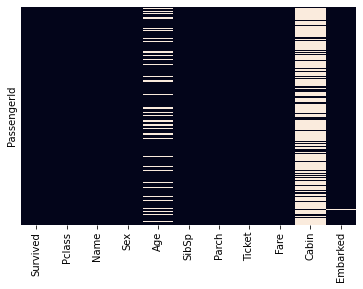

In [12]:
sns.heatmap(titanic.isnull(),yticklabels=False,cbar=False)

In [13]:
#There are null values in Age , Cabin , Embarked columns which are visible from the heatmap and isnull function

In [14]:
#Question 4 - Fill in all the missing values present in all the columns in the dataset

In [15]:
titanic.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

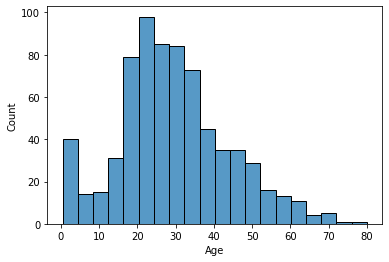

In [16]:
plt.figsize=(15,15)
sns.histplot(titanic["Age"])
plt.show()

In [17]:
#Age is numerical  and right skewed , so filling with the median values 

In [18]:
titanic['Age'].fillna(titanic['Age'].median(), inplace=True)

In [19]:
#Cabin and Embarked are categorical , so using the mode method for Embark and imputation method for the Cabin , we fill the data

In [20]:
from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

imp = imp.fit(titanic[['Cabin']])
titanic['Cabin'] = imp.transform(titanic[['Cabin']]).ravel()

In [21]:
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0], inplace=True)

In [22]:
titanic.isna().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [23]:
#We can see that there are no more null values in the data set

In [24]:
#Question 5 - Check and handle outliers in at least 3 columns in the dataset

In [25]:
#Checking with the box plot for outliers

<AxesSubplot:>

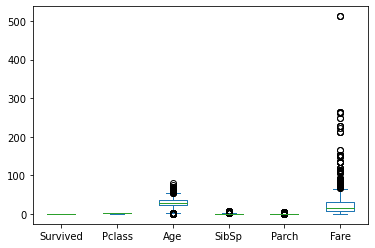

In [26]:
titanic.plot(kind='box', vert=True)

In [27]:
#Checking box plot individually for each column - the ouliers can be visible

<AxesSubplot:ylabel='SibSp'>

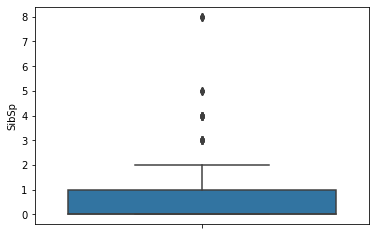

In [28]:
sns.boxplot(y=titanic["SibSp"])

<AxesSubplot:ylabel='Age'>

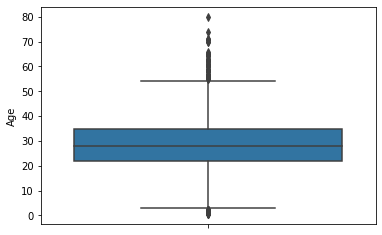

In [29]:
sns.boxplot(y=titanic["Age"])

<AxesSubplot:ylabel='Parch'>

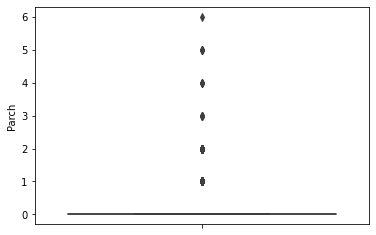

In [30]:
sns.boxplot(y=titanic["Parch"])

<AxesSubplot:ylabel='Fare'>

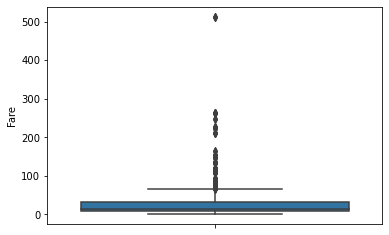

In [31]:
sns.boxplot(y=titanic["Fare"])

In [32]:
#Using percentile and IQR method we are dealing with the outlier

In [33]:
Q1 = np.percentile(titanic['SibSp'],25,interpolation = 'midpoint')
Q2 = np.percentile(titanic['SibSp'],50,interpolation = 'midpoint')
Q3 = np.percentile(titanic['SibSp'],75,interpolation = 'midpoint')

IQR = Q3-Q1
lower_limit = Q1 - (1.5*IQR)
upper_limit = Q3 + (1.5*IQR)

print("IQR is ",IQR)
print("Lower limit is" ,lower_limit)
print("Upper Limit is",upper_limit)

IQR is  1.0
Lower limit is -1.5
Upper Limit is 2.5


In [34]:
index=titanic['SibSp'][(titanic['SibSp']>upper_limit)|(titanic['SibSp']<lower_limit)].index
titanic.drop(index,inplace=True)

In [35]:
#The outliers will be dropped for all the values which are outside the upper and lower limit

<AxesSubplot:ylabel='SibSp'>

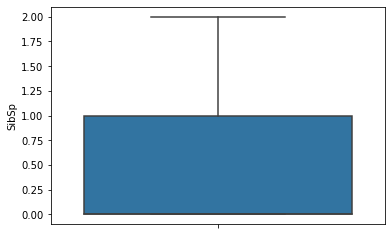

In [36]:
sns.boxplot(y=titanic["SibSp"])

In [37]:
#Can see from the above plot that there are no outliers in case of Sibsp

In [38]:
Q1 = np.percentile(titanic['Age'],25,interpolation = 'midpoint')
Q2 = np.percentile(titanic['Age'],50,interpolation = 'midpoint')
Q3 = np.percentile(titanic['Age'],75,interpolation = 'midpoint')

IQR = Q3-Q1
lower_limit = Q1 - (1.5*IQR)
upper_limit = Q3 + (1.5*IQR)

print("IQR is ",IQR)
print("Lower limit is" ,lower_limit)
print("Upper Limit is",upper_limit)

IQR is  13.0
Lower limit is 3.5
Upper Limit is 55.5


In [39]:
#In case of age , we replace values outside upper limit with upper limit
#Values below lower limit with lower limit

In [40]:
titanic['Age']=np.where(titanic['Age']>upper_limit,upper_limit,np.where(titanic['Age']<lower_limit,lower_limit,titanic['Age']))

<AxesSubplot:ylabel='Age'>

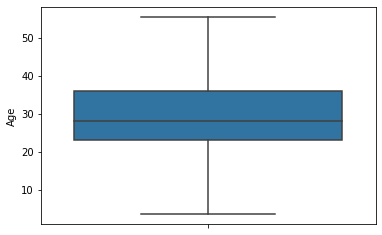

In [41]:
sns.boxplot(y=titanic["Age"])

In [42]:
#The above box plot shows Age after replacing the outliers

In [43]:
Q1 = titanic['Fare'].quantile(0.25)
Q3 = titanic['Fare'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
titanic['Fare']=np.where(titanic['Fare']>upper_whisker,upper_whisker,np.where(titanic['Fare']<lower_whisker,lower_whisker,titanic['Fare']))

<AxesSubplot:ylabel='Fare'>

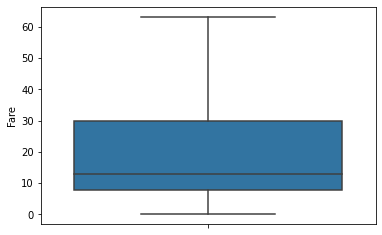

In [44]:
sns.boxplot(y=titanic["Fare"])

In [45]:
#The above box plot shows Fare outliers have been replaced with the lower and upper limit values

In [46]:
#Question 6 - Do min max scaling on the feature set (Take ‘Survived’ as target)

In [47]:
titanic['Survived'].describe()

count    845.00000
mean       0.39645
std        0.48945
min        0.00000
25%        0.00000
50%        0.00000
75%        1.00000
max        1.00000
Name: Survived, dtype: float64

In [48]:
data_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
survived_array = titanic[['Survived']]
survived_array_scaled = data_scaler.fit_transform(survived_array)
survived_array_scaled = pd.DataFrame(survived_array_scaled)

In [49]:
survived_array_scaled.describe()

,0
count,845.00000
mean,0.39645
std,0.48945
min,0.00000
25%,0.00000
50%,0.00000
75%,1.00000
max,1.00000


In [50]:
#Here already the survived data is within 0 and 1 , so no scaling has been done 